#HW 2 Linear Regression

###Importing modules and reading CSV (code cell 1)

In [8]:
#Code cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bloodglucose = pd.read_csv('/content/drive/MyDrive/Machine_Learning/HW_2/hba1c_bloodGlucose_selected_use_train_test_0.5_seed_31.csv', index_col = 0)
print(bloodglucose.head())

         hba1c  rbg_scaled
169   8.555813    0.879085
93    6.972834    0.330065
246  10.594119    1.846405
4     5.187378    0.454248
99    7.077409    0.905229


###Generating random number and splitting data (code cell 2)

In [10]:
#Code cell 2
from sklearn.model_selection import train_test_split
np.random.seed(31)
bg_fit, bg_test = train_test_split(bloodglucose, test_size = 0.50)

###Fitting to a line (code cell 3)

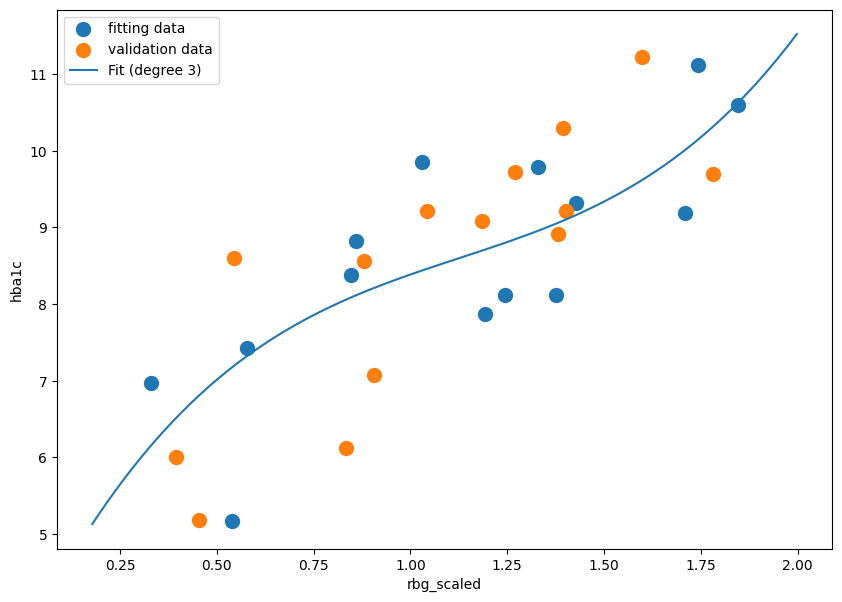

In [11]:

#Code cell 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


p3 = PolynomialFeatures(3)

x_fit = bg_fit[['rbg_scaled']]
y_fit = bg_fit['hba1c']
x_validation = bg_test[['rbg_scaled']]
y_validation = bg_test['hba1c']


bg_fit_p3 = p3.fit_transform(x_fit)
bg_test_p3 = p3.fit_transform(x_validation)

m = LinearRegression()
m.fit(bg_fit_p3, y_fit)


x_range = np.max(bloodglucose['rbg_scaled']) - np.min(bloodglucose['rbg_scaled'])
model_x = np.linspace(np.min(bloodglucose['rbg_scaled']) - 0.1*x_range, np.max(bloodglucose['rbg_scaled'])+ 0.1*x_range, 100).reshape(-1, 1)
model_x_p3 = p3.fit_transform(model_x)


figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)


ax.scatter(x_fit, y_fit, s=100, label='fitting data')
ax.scatter(x_validation, y_validation, s=100, label='validation data')

ax.plot(model_x, m.predict(model_x_p3), label='Fit (degree 3)')



ax.set_xlabel('rbg_scaled')
ax.set_ylabel('hba1c')
ax.legend()


plt.show()


###R^2 Score for fitting and testing data (code cell 4)

In [12]:
#Code cell 4

fit_score = m.score(p3.fit_transform(x_fit),y_fit )
print('Score for fitting data (degree 3):', fit_score)

validation_score = m.score(p3.fit_transform(x_validation),y_validation )
print('Score for validation data (degree 3):', validation_score)



Score for fitting data (degree 3): 0.6237055025260223
Score for validation data (degree 3): 0.6012152949575463


###Code cell 4 discussion
#####I think that this model is underfit since it is not really flexible enough to reach all or the majortiy of the data points. I believe that there is room for improvement and adding flexibilty or more parameters could improve the model. The score shows that the model is currently okay by being around 0.61 for both the fit score and validation score. This is a little over halfway between 0(model no better than mean) and 1 (perfect model), so it is not bad but has room for improvement. The scores are relatively the same between the fit data and validation data and this is a good sign since it means the model is behaving similarly for both sets of data.

###Fit to polynomial degree 10 (code cell 5)

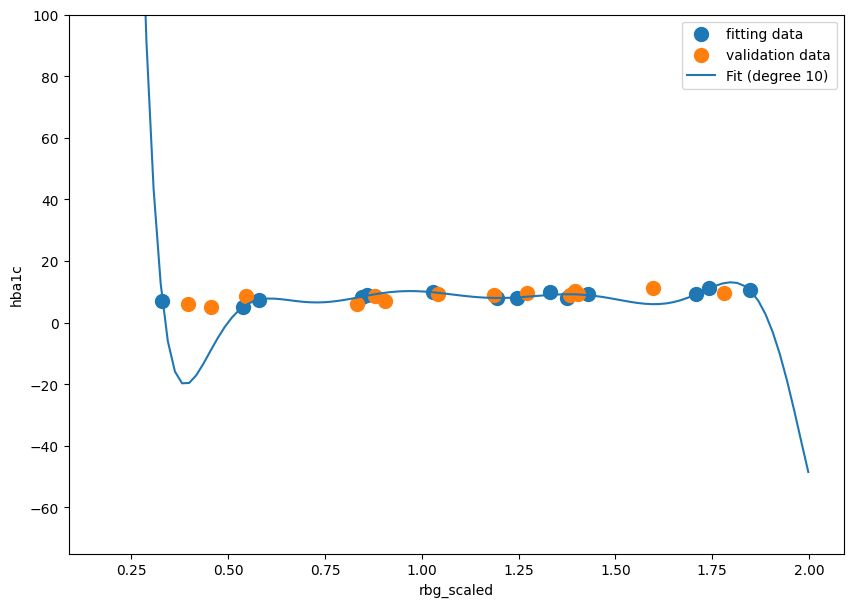

Score for fitting data (degree 10): 0.935141183766417
Score for validation data (degree 10): -22.39192482729845


In [13]:
#Code cell 5
p10 = PolynomialFeatures(10)

x_fit = bg_fit[['rbg_scaled']]
y_fit = bg_fit['hba1c']
x_validation = bg_test[['rbg_scaled']]
y_validation = bg_test['hba1c']


bg_fit_p10 = p10.fit_transform(x_fit)
bg_test_p10 = p10.fit_transform(x_validation)

m = LinearRegression()
m.fit(bg_fit_p10, y_fit)


x_range = np.max(bloodglucose['rbg_scaled']) - np.min(bloodglucose['rbg_scaled'])
model_x = np.linspace(np.min(bloodglucose['rbg_scaled']) - 0.1*x_range, np.max(bloodglucose['rbg_scaled'])+ 0.1*x_range, 100).reshape(-1, 1)
model_x_p10 = p10.fit_transform(model_x)


figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)


ax.scatter(x_fit, y_fit, s=100, label='fitting data')
ax.scatter(x_validation, y_validation, s=100, label='validation data')

ax.plot(model_x, m.predict(model_x_p10), label='Fit (degree 10)')



ax.set_xlabel('rbg_scaled')
ax.set_ylabel('hba1c')
ax.set_ylim(-75, 100)
ax.legend()


plt.show()

fit_score = m.score(p10.fit_transform(x_fit),y_fit )
print('Score for fitting data (degree 10):', fit_score)

validation_score = m.score(p10.fit_transform(x_validation),y_validation)
print('Score for validation data (degree 10):', validation_score)

###Code cell 5 discussion

#####The graph and scores shown above are an example of overfitting. You can see how the model is overfit in the graph because it aligns well with the data points but then outside of the data drops above and down in the beginning and end of the data set and has a bit of a strange curve between data points in the beginning. The scores also show us that the model is overfit because the score for the fitting data drastically improved to a 0.93 but at the cost of the validation data score which became -22.39 which is so much worse than 0 (meaning it is an even worse model than just predicting the mean).